CIFAR10 데이터셋 로딩 및 추론을 할 때 필요한 파이썬 모듈을 임포팅하기 

In [1]:
from tensorflow.keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
from google.colab.patches import cv2_imshow

CIFAR10 추론 파일을 로드하기. 추론파일: 트레이닝을 통해 계수를 최적화한 인공신경망을 파일로 만들어 저장한 것. 이 추론파일을 사용해서 feedforward 측 추론/예측을 진행함. 
코랩에서 추론파일을 사용할 때는 추론파일인 "cifar10.h5"을 코랩 디스크에 미리 업로드 해 놓아야 함 


In [4]:
# 추론 파일을 로드 함 
model = load_model('./cifar10.h5')

labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

내 이미지를 추론파일을 통해서 예측해 보기 
이제 인터넷에서 CIFAR10 데이터 종류 중 하나를 선택해서 코랩으로 옮기기. OpenCV를 이용해서 인터넷에서 예를 들어'비행기'이미지를 코랩으로 업로드 함 

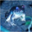

In [6]:
# 내가 판단할 이미지를 로드 OpenCV로 한다.
img = cv2.imread('plane.png')
cv2_imshow(img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

내 이미지 사이즈 조절하기. 
CIFAR10 추론파일은 32x32x3인 이미지만 추론을 할 수 있음. 따라서 내 이미지의 사이즈를 32x32x3으로 축소해야 함. OpenCV 라이브러리를 이용해서 사이즈를 추론파일에 입력할 수 있도록 조정함 

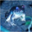

In [9]:
img_resized = cv2.resize(img, (32,32))
cv2_imshow(img_resized)
cv2.waitKey(2000)
cv2.destroyAllWindows()

내 이미지 노말라이징 
내가 업로드 한 이미지는 한 픽셀마다 3개의 0 ~ 255인 숫자로 구성되어 있음. 이 숫자의 범위를 0 ~ 1로 조정함. 이렇게 하면 feedforwarding 예측 성능이 향상됨 

In [10]:
# Normalizing 
img_norm = img.astype('float')/255.0
print(img_norm)

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


Flattening 
내 이미지를 사이즈 조정 -> 노말라이징을 한 다음에는 이미지의 픽셀숫자 배열을 flattening을 함. 32x32x3인 이미지를 1x(32x32x3)으로 변경해야함 CIFAR10 신경망에 입력이 가능함   

In [11]:
# flattening 
img_flat = img_norm.reshape((3072,1))
#print(img_flat.shape)

추론하기 
이제 내 이미지를 전처리해서 추론파일에 입력할 준비가 됨. 전처리된 내 이미지를 추론파일에 입력해서 예측을 실행 

In [12]:
# 추론하기, inference, feed-forward 
## X -> img_flat에 []을 한번더 씌운 것 
X = np.asarray([img_flat])
#print(X.shape)
# 여기서 입력이미지를 추론파일에 곱하는 것 
## return 값은 softmax
predictions = model(X, training=False)
print(predictions)
print(np.argmax(predictions))

tf.Tensor(
[[1.2043898e-06 2.3357450e-07 9.3480294e-06 2.0474745e-06 4.5847282e-06
  1.4673181e-04 9.9973506e-01 1.0083469e-04 4.0405821e-12 2.0529332e-10]], shape=(1, 10), dtype=float32)
6
